In [ ]:
from astropy.io import fits

fits_file = fits.open('Light_M42_180.0s_Bin1_0016.fit')

print(fits_file)

In [12]:
image_data = fits_file[0].data

print(image_data)

[[ 984 1294  994 ... 1391  873 1331]
 [1356 1270 1415 ... 1277 1454 1209]
 [ 984 1294  930 ... 1527  958 1427]
 ...
 [1356 1278 1449 ... 1273 1397 1242]
 [ 899 1365  875 ... 1283  976 1366]
 [1370 1260 1366 ... 1201 1397 1242]]


<function matplotlib.pyplot.show(close=None, block=None)>

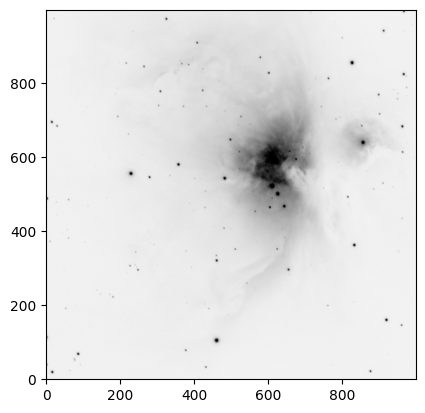

In [24]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

section1 = image_data[1500:2500, 2500:3500]

plt.figure()
plt.imshow(section1, origin = 'lower', norm = LogNorm(), cmap='Greys')
plt.colorbar
plt.show

In [23]:
from astropy.stats import sigma_clipped_stats

mean, median, std = sigma_clipped_stats(section1, sigma = 3.0)

print((mean, median, std))

(np.float64(1667.1201694323856), np.float64(1606.0), np.float64(365.9763620041279))


In [25]:
from photutils.detection import DAOStarFinder

daofind = DAOStarFinder(fwhm= 3.0, threshold= 5.0*std)

sources = daofind(section1-median)

for col in sources.colnames:
    if col not in ('id', 'npix'):
        sources[col].info.format = '%.2f'
        
sources.pprint(max_width = 76)

 id xcentroid ycentroid sharpness ...   peak      flux     mag   daofind_mag
--- --------- --------- --------- ... -------- ---------- ------ -----------
  1     16.92     18.46      0.43 ... 63929.00  733198.00 -14.66       -3.56
  2    876.74     20.60      0.35 ... 32047.00  342698.00 -13.84       -3.05
  3    431.91     32.02      0.47 ... 18641.00  154347.00 -12.97       -2.43
  4      1.52     38.80      0.44 ... 22715.00  201835.00 -13.26       -2.67
  5     77.64     51.29      0.33 ...  5092.00   57701.00 -11.90       -1.09
  6     75.76     54.60      0.37 ...  1937.00   19944.00 -10.75       -0.11
  7     86.99     67.44      0.44 ... 63929.00  730183.00 -14.66       -3.57
  8    377.60     77.46      0.39 ... 16656.00  175994.00 -13.11       -2.27
  9    960.86    145.17      0.42 ... 17798.00  160420.00 -13.01       -2.42
 10    919.84    159.45      0.22 ... 63929.00  966925.00 -14.96       -3.80
...       ...       ...       ... ...      ...        ...    ...         ...

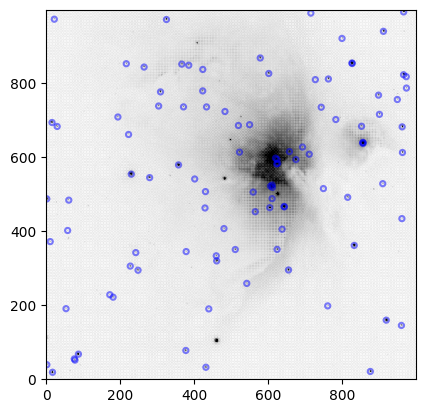

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.aperture import CircularAperture

positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r = 7.0)
plt.imshow(section1, cmap='Greys', origin='lower', norm = LogNorm(), interpolation='nearest')

apertures.plot(color = 'blue', lw = 1.5, alpha = 0.5)